In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_csv('transactions.csv')

In [3]:
transactions.columns

Index(['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS', 'VISITS', 'HHS', 'SPEND',
       'PRICE', 'BASE_PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY'],
      dtype='object')

In [5]:
transactions = transactions.rename(index = str, columns={'PRICE': 'base_price', 'BASE_PRICE': 'price'})

In [6]:
transactions = transactions.drop('SPEND', axis = 1)

In [7]:
transactions['SPEND'] = transactions['price'] * transactions['UNITS']

In [4]:
transactions.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,14-Jan-09,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,14-Jan-09,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0


In [9]:
transactions.WEEK_END_DATE = pd.to_datetime(transactions.WEEK_END_DATE)

In [10]:
transactions.index = transactions.WEEK_END_DATE

In [11]:
unique_stores = transactions.STORE_NUM.unique()

In [12]:
unique_products = transactions.UPC.unique()

In [13]:

store_a_prod_a = transactions[(transactions.UPC == unique_products[3]) & (transactions.STORE_NUM == unique_stores[2])]

In [14]:
store_a_prod_a

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-14,2009-01-14,389,1111035398,4,3,3,3.50,4.49,0,0,1,17.96
2009-01-21,2009-01-21,389,1111035398,2,2,2,3.33,4.49,0,0,1,8.98
2009-01-28,2009-01-28,389,1111035398,2,2,2,3.50,4.49,0,0,1,8.98
2009-02-04,2009-02-04,389,1111035398,7,4,4,3.50,4.49,0,0,1,31.43
2009-02-11,2009-02-11,389,1111035398,1,1,1,4.49,4.49,0,0,0,4.49
2009-02-25,2009-02-25,389,1111035398,1,1,1,4.49,4.49,0,0,0,4.49
2009-03-04,2009-03-04,389,1111035398,2,2,2,4.49,4.49,0,0,0,8.98
2009-03-11,2009-03-11,389,1111035398,2,2,2,3.99,4.49,0,0,1,8.98
2009-03-18,2009-03-18,389,1111035398,3,3,3,3.99,4.49,0,0,1,13.47


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# FITTING THE PED constants:

In [26]:
data = transactions[(transactions.UPC == unique_products[3]) & (transactions.STORE_NUM == unique_stores[1])]

In [27]:
data.shape

(131, 12)

In [28]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-14,2009-01-14,387,1111035398,4,4,4,3.50,4.49,0,0,1,17.96
2009-01-21,2009-01-21,387,1111035398,8,7,7,3.50,4.49,0,0,1,35.92
2009-01-28,2009-01-28,387,1111035398,2,2,2,3.50,4.49,0,0,1,8.98
2009-02-04,2009-02-04,387,1111035398,6,6,6,3.67,4.49,0,0,1,26.94
2009-08-05,2009-08-05,387,1111035398,15,15,15,3.00,3.00,0,0,0,45.00


In [30]:
linear_model = ols("UNITS ~ price", data=data).fit()

In [34]:
linear_model.params

Intercept    16.999245
price        -2.440755
dtype: float64

In [32]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  UNITS   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.106
Date:                Mon, 26 Nov 2018   Prob (F-statistic):             0.0804
Time:                        15:49:23   Log-Likelihood:                -373.01
No. Observations:                 131   AIC:                             750.0
Df Residuals:                     129   BIC:                             755.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9992      4.329      3.927      0.0

In [45]:
def f(x):
    return linear_model.params['Intercept']+linear_model.params['price']*x

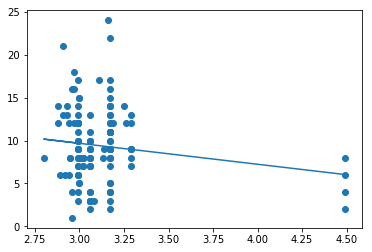

In [47]:
plt.scatter(data.price, data.UNITS)


plt.plot(data.price, f(data.price))

In [ ]:
estimated_PED = data.apply(lambda x:linear_model.params['Intercept']+linear_model.params['price']*x.price, axis=1).astype(int)

In [54]:
# Fitting the income to price dependency

# extrapolate = (data.SPEND - data.base_price*data.UNITS_)*(linear_model.params['Intercept']+linear_model.params['price']*data.price)

In [55]:
import numpy as np

In [71]:
def extrapolator(data, linear_model):
    actual_base_price = data.base_price.iloc[-1]
    
    x = np.arange(data.price.min(), data.price.max(), 0.01)
    y = []
    
    for i in range(x.shape[0]):
        y.append((x[i] - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*x[i]))
    
    return(plt.plot(x,y))

IndentationError: expected an indented block (<ipython-input-71-f27694d23bb1>, line 8)

In [62]:
actual_base_price = data.base_price.iloc[-1]

In [72]:
x = np.arange(data.price.min(), data.price.max()+5, 0.01)
y = []

In [73]:
for i in range(x.shape[0]):
    y.append((x[i] - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*x[i]))

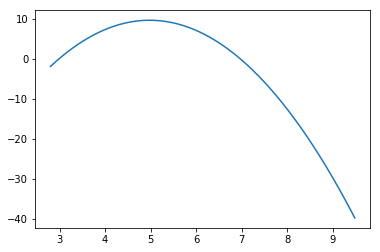

In [74]:
plt.plot(x,y)

In [87]:
y_test.index = x_test.index

In [89]:
import numpy as np

In [94]:
np.sqrt(np.square(y_test - beef_model.predict(x_test))) / y_test.shape[]

In [98]:
from sklearn.metrics import mean_absolute_error

# for small sample mae = 5.3783..


In [132]:
mean_absolute_error(beef_model.predict(x_test), y_test )

54.97576128642355

In [133]:
beef_model.predict(x_test)

WEEK_END_DATE
2011-08-17    163.366905
2011-08-24    160.547195
2011-08-31    160.547195
2011-09-07    163.366905
2011-09-14    163.366905
2011-09-21    163.366905
2011-09-28    163.366905
2011-10-05    164.071833
2011-10-12    163.366905
2011-10-19    157.727485
2011-10-26    158.432413
2011-11-02    157.727485
2011-11-09    158.432413
2011-11-16    158.432413
2011-11-23    157.727485
2011-11-30    157.727485
2011-12-07    157.727485
2011-12-14    157.727485
2011-12-21    157.727485
2011-12-28    157.727485
dtype: float64

In [134]:
y_test

455824    178
459167    192
462509    188
465884    172
469262    269
472669    223
475966    211
479217    235
482540    178
485855    209
489139    203
492390    220
495665    232
499014    190
502338    207
505623    175
508860    203
512110    205
515393    308
518652    304
Name: UNITS, dtype: int64

In [102]:
beef_model.predict(x_test)

WEEK_END_DATE
2011-08-17    16.470510
2011-08-24    15.780861
2011-08-31    15.505002
2011-09-07    16.056721
2011-09-14    16.056721
2011-09-21    16.056721
2011-09-28    16.608439
2011-10-05    16.056721
2011-10-12    16.056721
2011-10-19    15.505002
2011-10-26    14.953283
2011-11-02    14.953283
2011-11-16    15.091213
2011-11-23    15.091213
2011-11-30    14.953283
2011-12-07    14.953283
2011-12-14    14.953283
2011-12-21    14.953283
2011-12-28    14.953283
2012-01-04    15.367072
dtype: float64

In [103]:
y_test.describe()

count    20.000000
mean     12.450000
std       5.041668
min       5.000000
25%       9.000000
50%      11.500000
75%      15.000000
max      22.000000
Name: UNITS, dtype: float64

In [73]:
beef_model.get_prediction()

In [47]:
xgb.train(X_train, )


<module 'xgboost' from '/home/olksndr/project/gallantra/lib/python3.5/site-packages/xgboost/__init__.py'>

In [51]:
X_train

,WEEK_END_DATE,STORE_NUM,UPC,VISITS,HHS,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,2009-01-14,367,1111009477,13,13,1.39,1.57,0,0,1
1,2009-01-21,367,1111009477,23,23,1.39,1.57,0,0,1
2,2009-01-28,367,1111009477,7,7,1.36,1.36,0,0,0
3,2009-02-04,367,1111009477,12,12,1.38,1.38,0,0,0
4,2009-02-11,367,1111009477,14,14,1.50,1.50,0,0,0
5,2009-02-18,367,1111009477,20,20,1.49,1.49,0,0,0
6,2009-02-25,367,1111009477,11,11,1.49,1.49,0,0,0
7,2009-03-04,367,1111009477,10,10,1.49,1.49,0,0,0
8,2009-03-11,367,1111009477,12,12,1.39,1.39,0,0,0
9,2009-03-18,367,1111009477,10,10,1.48,1.48,0,0,0
